In [23]:
import bw2data as bd
import bw2calc as bc

In [24]:
bd.projects.set_current("bw25_plca_grid_expansion")

In [25]:
list(bd.databases)

['ecoinvent-3.10-biosphere',
 'ecoinvent-3.10-cutoff',
 'ei310_SSP2_RCP26_2023',
 'ei310_SSP2_RCP26_2025',
 'ei310_SSP2_RCP26_2030',
 'ei310_SSP2_RCP26_2035',
 'ei310_SSP2_RCP26_2037',
 'ei310_SSP2_RCP26_2040',
 'ei310_SSP2_RCP26_2045',
 'ei310_SSP2_RCP19_2023',
 'ei310_SSP2_RCP19_2025',
 'ei310_SSP2_RCP19_2030',
 'ei310_SSP2_RCP19_2035',
 'ei310_SSP2_RCP19_2037',
 'ei310_SSP2_RCP19_2040',
 'ei310_SSP2_RCP19_2045',
 'grid_status_quo',
 'grid_expansion_prospective',
 'grid_components_RCP26_2023',
 'grid_components_RCP26_2025',
 'grid_components_RCP26_2030',
 'grid_components_RCP26_2035',
 'grid_components_RCP26_2037',
 'grid_components_RCP26_2040',
 'grid_components_RCP19_2023',
 'grid_components_RCP19_2025',
 'grid_components_RCP19_2030',
 'grid_components_RCP19_2035',
 'grid_components_RCP19_2037',
 'grid_components_RCP19_2040',
 'grid_expansion_static',
 'new_mixes']

In [26]:
method = (
    "EF v3.1 no LT",
    "climate change no LT",
    "global warming potential (GWP100) no LT",
)

## Static vs prospective expansion

In [75]:

static_expansion_nodes = sorted([node for node in bd.Database("grid_expansion_static")])
prospective_expansion_nodes_rcp26 = [node for node in bd.Database("grid_expansion_prospective") if "RCP26" in node["name"]]
prospective_expansion_nodes_rcp19 = [node for node in bd.Database("grid_expansion_prospective") if "RCP19" in node["name"]]
prospective_expansion_nodes = prospective_expansion_nodes_rcp26 + prospective_expansion_nodes_rcp19

Static expansion:

In [28]:
results = {}
lca = bc.LCA(demand={static_expansion_nodes[0]: 1}, method=method)
lca.lci(factorize=True)
for node in static_expansion_nodes:
    component_results = {}
    for exc in node.technosphere():
        lca.lcia(demand={exc.input.id: exc.amount})
        component_results[exc.input['name']] = lca.score
    results[node["name"]] = component_results
        

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/bw2calc/lca_base.py:127: SparseEfficiencyWarning: splu converted its input to CSC format
  self.solver = factorized(self.technosphere_matrix)
/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 8.10e+12)
  warnings.warn(msg, UmfpackWarning)


Prospective expansion:

In [29]:
lca = bc.LCA(demand={prospective_expansion_nodes[0]: 1}, method=method)
lca.lci(factorize=True)
for node in prospective_expansion_nodes:
    component_results = {}
    for exc in node.technosphere():
        lca.lcia(demand={exc.input.id: exc.amount})
        component_results[exc.input['name']] = lca.score
    results[node["name"]] = component_results

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 9.43e+12)
  warnings.warn(msg, UmfpackWarning)


In [46]:
import pandas as pd
df_components = pd.DataFrame(results)

df_components.columns = pd.MultiIndex.from_tuples(
    [(col.split('_', 2)[1], col.rsplit('_', 1)[1]) for col in df_components.columns]
)
df_components

static                \
                                                     2025          2030   
Overhead line, 400kV                         6.439063e+08  1.609766e+09   
Overhead line HVDC                           2.202011e+07  5.505028e+07   
Land cable, oil insulated, copper, HVDC      3.532161e+08  8.830403e+08   
Overhead line, 150kV                         5.664059e+08  1.416015e+09   
Land cable, vpe insulated, aluminium, 50kV   2.117924e+06  5.294810e+06   
Land cable, oil insulated, copper, 150kV     1.263699e+07  3.159247e+07   
Transformer, 250MVA                          1.260914e+07  3.152284e+07   
Overhead line, 10kV                          8.246414e+07  2.061604e+08   
Land cable, vpe insulated, aluminium, 10kV   2.056867e+08  5.142168e+08   
Land cable, epr insulated, copper, 11kV      1.065751e+08  2.664378e+08   
Transformer, 40MVA                           3.750535e+07  9.376336e+07   
Gas insulated switchgear, 420kV              2.302144e+08  5.755361e+08   
Substation, MV                               1.371221e+07  3.428053e+07   
Overhead line, 0.4kV                         2.168044e+07  5.420111e+07   
Land cable, vpe insulated, aluminium, 0.4kV  4.673507e+08  1.168377e+09   
Land cable, vpe insulated, copper, 1kV       6.685743e+07  1.671436e+08   
Transformer, 315kVA                          6.875326e+07  1.718832e+08   
Substation, LV                               1.667468e+07  4.168669e+07   

                                                                         \
                                                     2035          2037   
Overhead line, 400kV                         1.609766e+09  6.439063e+08   
Overhead line HVDC                           5.505028e+07  2.202011e+07   
Land cable, oil insulated, copper, HVDC      8.830403e+08  3.532161e+08   
Overhead line, 150kV                         1.416015e+09  5.664059e+08   
Land cable, vpe insulated, aluminium, 50kV   5.294810e+06  2.117924e+06   
Land cable, oil insulated, copper, 150kV     3.159247e+07  1.263699e+07   
Transformer, 250MVA                          3.152284e+07  1.260914e+07   
Overhead line, 10kV                          2.061604e+08  8.246414e+07   
Land cable, vpe insulated, aluminium, 10kV   5.142168e+08  2.056867e+08   
Land cable, epr insulated, copper, 11kV      2.664378e+08  1.065751e+08   
Transformer, 40MVA                           9.376336e+07  3.750535e+07   
Gas insulated switchgear, 420kV              5.755361e+08  2.302144e+08   
Substation, MV                               3.428053e+07  1.371221e+07   
Overhead line, 0.4kV                         5.420111e+07  2.168044e+07   
Land cable, vpe insulated, aluminium, 0.4kV  1.168377e+09  4.673507e+08   
Land cable, vpe insulated, copper, 1kV       1.671436e+08  6.685743e+07   
Transformer, 315kVA                          1.718832e+08  6.875326e+07   
Substation, LV                               4.168669e+07  1.667468e+07   

                                                                         \
                                                     2040          2045   
Overhead line, 400kV                         3.574080e+07  5.956800e+07   
Overhead line HVDC                           1.547510e+07  2.579184e+07   
Land cable, oil insulated, copper, HVDC      2.482301e+08  4.137169e+08   
Overhead line, 150kV                         7.929123e+08  1.321520e+09   
Land cable, vpe insulated, aluminium, 50kV   2.964884e+06  4.941473e+06   
Land cable, oil insulated, copper, 150kV     1.769054e+07  2.948423e+07   
Transformer, 250MVA                          8.836380e+06  1.472730e+07   
Overhead line, 10kV                          1.193537e+08  1.989228e+08   
Land cable, vpe insulated, aluminium, 10kV   2.976987e+08  4.961646e+08   
Land cable, epr insulated, copper, 11kV      2.797597e+08  4.662662e+08   
Transformer, 40MVA                           5.323675e+07  8.872792e+07   
Gas insulated switchgear, 420kV              3.267766e+08  5.446276e+08   

## Plot

In [40]:
from RWTHColors import ColorManager

cm = ColorManager()

plot_colors = []
plot_colors_light = []
color_list = [
    cm.RWTHBlau,
    #   cm.RWTHPetrol,
    cm.RWTHTuerkis,
    cm.RWTHGruen,
    cm.RWTHMaiGruen,
    cm.RWTHOrange,
    cm.RWTHRot,
    # cm.RWTHBordeaux,
    # cm.RWTHViolett,
    cm.RWTHLila,
]
intensities = [100, 50, 10]

for intensity in intensities:
    for color in color_list:
        plot_colors.append(color.p(intensity))

for intensity in [75, 50, 10]:
    for color in color_list:
        plot_colors_light.append(color.p(intensity))

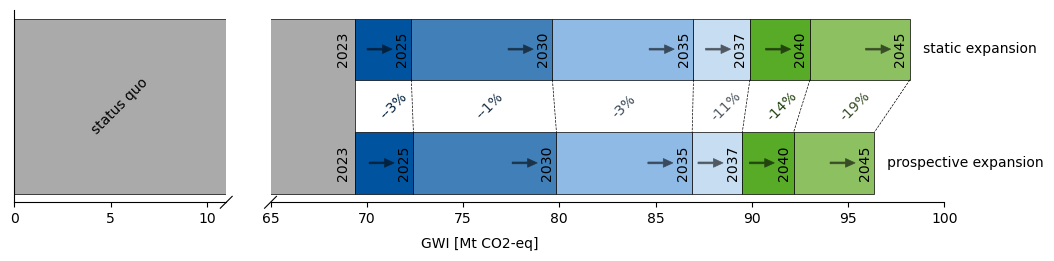

In [43]:
from brokenaxes import brokenaxes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
def darken_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = mcolors.to_rgb(c)
    return mcolors.to_hex([max(0, min(1, c[0] * amount)),
                           max(0, min(1, c[1] * amount)),
                           max(0, min(1, c[2] * amount))])
    
data_base = {"Score": [69383294328.312 / 1e9]}
df_base = pd.DataFrame(data_base)

data_static = {"Score": df_components["static"].sum().values/1e9}
df_static = pd.DataFrame(data_static)

data_prospective = {"Score": df_components["RCP26"].sum().values/1e9}
df__prospective = pd.DataFrame(data_prospective)

fig = plt.figure(figsize=(12, 2.5))
fig.subplots_adjust(wspace=0.1)
bax = brokenaxes(xlims=((0, 11), (65, 100)), d=0.007)

# Starting point for the add-ons
addon_start = sum(df_base["Score"])

# Settings for the bars
base_bar_height = 1
addon_bar_height = base_bar_height * 0.35  # 40% of the base bar's height

# Plot the main product's scores
left_extent = 0
for score in df_base["Score"]:
    bax.barh(
        0,
        width=score,
        left=left_extent,
        height=base_bar_height,
        # color=cm.RWTHBlau.p(100),
        color="#aaaaaa",
        edgecolor="black",
        linewidth=0.5,
    )
    mid_point = 5.5
    bax.text(
        # addon_start - 2.5,
        mid_point,
        0,
        "status quo",
        ha="center",
        va="center",
        color="black",
        rotation=45,
    )
    left_extent += score


def plot_addons(df, addon_start, y_position, bar_height, label, colors):
    bax.text(addon_start - 0.25, y_position, "2023", ha="right", va="center", rotation=90)
    total_width = addon_start  # Initialize total width to the starting point
    for (idx, score), year in zip(
        enumerate(df["Score"]),
        ["2025", "2030", "2035", "2037", "2040", "2045"],
    ):
        bax.barh(
            y_position,
            width=score,
            left=addon_start,
            height=bar_height,
            color=colors[idx],
            edgecolor="black",
            linewidth=0.5,
        )
        
        pos_year = addon_start + score - 0.5
        bax.text( 
            pos_year,
            y_position,
            year,
            ha="center",
            va="center",
            color="black",
            rotation=90,
        )
        bax.arrow(
            pos_year - 1.8,
            y_position,
            0.8,
            0,
            width=0.01,
            head_width=0.05,
            head_length=0.5,
            fc=darken_color(colors[idx], .4),
            ec=darken_color(colors[idx], .4),
            lw=0.5,
            # overhang=0.5,
        )
        addon_start += score
        total_width += score  # Accumulate the total width

    # Place the label to the right of the last bar
    bax.text(total_width, y_position, label, ha="left", va="center")
    
colors_addon = [
    cm.RWTHBlau.p(100),
    cm.RWTHBlau.p(75),
    cm.RWTHBlau.p(50),
    cm.RWTHBlau.p(25),
    cm.RWTHGruen.p(100),
    cm.RWTHGruen.p(75),
    ]
plot_addons(
    df_static,
    addon_start,
    base_bar_height * 0.325,
    addon_bar_height,
    "   static expansion",
    colors=colors_addon,
)  # Generate colors)
plot_addons(
    df__prospective,
    addon_start,
    -base_bar_height * 0.325,
    addon_bar_height,
    "   prospective expansion",
    colors=colors_addon,
)

bax.set_xlabel("GWI [Mt CO2-eq]", labelpad=25)

x_static=addon_start
x_prospective=addon_start
for label_pos, v1, v2, color in zip([2, 7, 14, 19.3, 22.2, 26], df_static.values, df__prospective.values, colors_addon):
    reduction = int((v1-v2)/v1*100)
    bax.text(
        addon_start + label_pos,
        0,
        f"-{reduction}%",
        horizontalalignment="center",
        verticalalignment="center",
        rotation=45,
        color=darken_color(color, 0.4),
        # color='black',
    )

    x_static = x_static + v1
    x_prospective = x_prospective + v2
    bax.plot([x_static, x_prospective], [base_bar_height * 0.325 - addon_bar_height / 2, - base_bar_height * 0.325 + addon_bar_height / 2], color="black", linewidth=0.5, linestyle="--")

bax.axs[0].set_yticks([]) 
bax.axs[0].set_yticklabels([])

plt.savefig("fig_static_vs_prospective_arrows.svg", format="svg", bbox_inches='tight')
plt.show()

Draft with 3 bars:

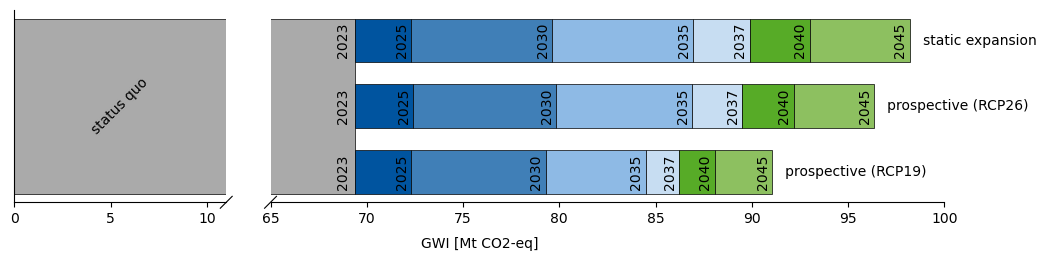

In [123]:
from brokenaxes import brokenaxes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
def darken_color(color, amount=0.5):
    try:
        c = mcolors.cnames[color]
    except:
        c = color
    c = mcolors.to_rgb(c)
    return mcolors.to_hex([max(0, min(1, c[0] * amount)),
                           max(0, min(1, c[1] * amount)),
                           max(0, min(1, c[2] * amount))])
    
data_base = {"Score": [69383294328.312 / 1e9]}
df_base = pd.DataFrame(data_base)

data_static = {"Score": df_components["static"].sum().values/1e9}
df_static = pd.DataFrame(data_static)

data_rcp26 = {"Score": df_components["RCP26"].sum().values/1e9}
df_rcp26 = pd.DataFrame(data_rcp26)

data_rcp19 = {"Score": df_components["RCP19"].sum().values/1e9}
df_rcp19 = pd.DataFrame(data_rcp19)

fig = plt.figure(figsize=(12, 2.5))
fig.subplots_adjust(wspace=0.1)
bax = brokenaxes(xlims=((0, 11), (65, 100)), d=0.007)

# Starting point for the add-ons
addon_start = sum(df_base["Score"])

# Settings for the bars
base_bar_height = 2
addon_bar_height = base_bar_height * 0.25  # 40% of the base bar's height

# Plot the main product's scores
left_extent = 0
for score in df_base["Score"]:
    bax.barh(
        0,
        width=score,
        left=left_extent,
        height=base_bar_height,
        # color=cm.RWTHBlau.p(100),
        color="#aaaaaa",
        edgecolor="black",
        linewidth=0.5,
    )
    mid_point = 5.5
    bax.text(
        # addon_start - 2.5,
        mid_point,
        0,
        "status quo",
        ha="center",
        va="center",
        color="black",
        rotation=45,
    )
    left_extent += score


def plot_addons(df, addon_start, y_position, bar_height, label, colors):
    bax.text(addon_start - 0.25, y_position, "2023", ha="right", va="center", rotation=90)
    total_width = addon_start  # Initialize total width to the starting point
    for (idx, score), year in zip(
        enumerate(df["Score"]),
        ["2025", "2030", "2035", "2037", "2040", "2045"],
    ):
        bax.barh(
            y_position,
            width=score,
            left=addon_start,
            height=bar_height,
            color=colors[idx],
            edgecolor="black",
            linewidth=0.5,
        )
        
        pos_year = addon_start + score - 0.5
        bax.text( 
            pos_year,
            y_position,
            year,
            ha="center",
            va="center",
            color="black",
            rotation=90,
        )
        # bax.arrow(
        #     pos_year - 1.8,
        #     y_position,
        #     0.8,
        #     0,
        #     width=0.01,
        #     head_width=0.05,
        #     head_length=0.5,
        #     fc=darken_color(colors[idx], .4),
        #     ec=darken_color(colors[idx], .4),
        #     lw=0.5,
        #     # overhang=0.5,
        # )
        addon_start += score
        total_width += score  # Accumulate the total width

    # Place the label to the right of the last bar
    bax.text(total_width, y_position, label, ha="left", va="center")
    
colors_addon = [
    cm.RWTHBlau.p(100),
    cm.RWTHBlau.p(75),
    cm.RWTHBlau.p(50),
    cm.RWTHBlau.p(25),
    cm.RWTHGruen.p(100),
    cm.RWTHGruen.p(75),
    ]
plot_addons(
    df_static,
    addon_start,
    base_bar_height * 0.375,
    addon_bar_height,
    "   static expansion",
    colors=colors_addon,
)  # Generate colors)
plot_addons(
    df_rcp26,
    addon_start,
   0,
    addon_bar_height,
    "   prospective (RCP26)",
    colors=colors_addon,
)
plot_addons(
    df_rcp19,
    addon_start,
    -base_bar_height * 0.375,
    addon_bar_height,
    "   prospective (RCP19)",
    colors=colors_addon,
)

bax.set_xlabel("GWI [Mt CO2-eq]", labelpad=25)

bax.axs[0].set_yticks([]) 
bax.axs[0].set_yticklabels([])

plt.savefig("fig_static_vs_prospective_arrows.svg", format="svg", bbox_inches='tight')
plt.show()

## Contributions

In [88]:
def map_labels(labels, groups, other_label="other"):
    new_labels = {}
    for label in labels:
        for key, group in groups.items():
            if key in label:
                new_labels[label] = group
                break
        else:
            new_labels[label] = other_label
    return new_labels

### Components

In [95]:
components = pd.DataFrame({
    "static": df_components["static"].T.sum().values,
    "RCP26": df_components["RCP26"].T.sum().values,
    "RCP19": df_components["RCP19"].T.sum().values
}, index=df_components.index)

component_groups = {
    "Overhead line": "overhead lines",
    "cable": "cables",
    "Transformer": "transformers",
    "switchgear": "switchgears",
    "Substation": "substations",
}

components.index = components.index.map(
    map_labels(components.index, component_groups, other_label="other components")
)
components = components.groupby(level=0).sum()

# sorting
components['sort_key'] = components.index != 'other components'
components = components.sort_values(by=['sort_key', "static"], ascending=[True, True])
components = components.drop(columns='sort_key')

components.loc["SPACING"] = [0, components['static'].sum() - components['RCP26'].sum(), components['static'].sum() - components['RCP19'].sum()]
components

,static,RCP26,RCP19
substations,3.396459e+08,3.109040e+08,2.722479e+08
transformers,1.257402e+09,1.159841e+09,9.436688e+08
switchgears,2.482905e+09,2.467552e+09,2.425915e+09
overhead lines,1.200502e+10,1.130767e+10,9.033231e+09
cables,1.273904e+10,1.173247e+10,8.994830e+09
SPACING,0.000000e+00,1.845582e+09,7.154125e+09


### Materials

In [49]:
results = {}
bioflows = {}

for node in static_expansion_nodes + prospective_expansion_nodes:
    component_results = {}
    lca = bc.LCA({node: 1}, method=method)
    lca.lci(factorize=True)
    for component in node.technosphere():
        material_results = {}
        for material in list(component.input.technosphere()):
            lca.lcia(demand={material.input.id: material.amount * component.amount})
            material_results[material.input['name']] = lca.score 
        for bioflow in component.input.biosphere():
            bioflows[component.input['name']] = bioflow
        component_results[component.input['name']] = material_results
        
    results[node["name"]] = component_results

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/bw2calc/lca_base.py:127: SparseEfficiencyWarning: splu converted its input to CSC format
  self.solver = factorized(self.technosphere_matrix)
/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 8.10e+12)
  warnings.warn(msg, UmfpackWarning)
/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 9.43e+12)
  warnings.warn(msg, UmfpackWarning)


In [96]:
# Initialize a dictionary to hold the summed values
material_sums = {}

# Iterate through the data to sum the materials across all components
for scenario, comp in results.items():
    for component, materials in comp.items():
        for material, value in materials.items():
            if material not in material_sums:
                material_sums[material] = {}
            if scenario not in material_sums[material]:
                material_sums[material][scenario] = 0
            material_sums[material][scenario] += value

# Convert the summed materials dictionary to a DataFrame
materials = pd.DataFrame.from_dict(material_sums, orient='index')

In [97]:
import json

with open("data/distributed_components.json", "r") as file:
    distributed_components = json.load(file)

sf6_row = {}

for col, year in zip(
    materials.columns,
    [2023, 2025, 2030, 2035, 2037, 2040, 2023, 2025, 2030, 2035, 2037, 2040, 2023, 2025, 2030, 2035, 2037, 2040],
):
    sf6_impact = distributed_components[str(year)]["gas_insulated_switchgear_420kv"] * 28.6 * 25200 # emissions and CF of sf6
    sf6_row[col] = sf6_impact

materials.loc["sulfur hexafluoride"] = sf6_row

In [98]:
material_groups = {
    "aluminium": "aluminium",
    "copper": "copper",
    "iron": "iron & steel",
    "steel": "iron & steel",
    "concrete": "concrete",
    "cement": "concrete",
    "sulfur hexafluoride": "SF6",
    "polyethylene": "plastics",
    "polypropylene": "plastics",
    "plastic": "plastics",
}

materials.index = materials.index.map(
    map_labels(materials.index, material_groups, other_label="other materials")
)
materials = materials.groupby(level=0).sum()

materials.columns = pd.MultiIndex.from_tuples(
    [(col.split('_', 2)[1], col.rsplit('_', 1)[1]) for col in materials.columns]
)

materials = pd.DataFrame({
    "static": materials["static"].T.sum().values,
    "RCP26": materials["RCP26"].T.sum().values,
    "RCP19": materials["RCP19"].T.sum().values,
}, index=materials.index)

# sorting
materials['sort_key'] = materials.index != 'other materials'
materials = materials.sort_values(by=['sort_key', "static"], ascending=[True, True])
materials = materials.drop(columns='sort_key')

materials.loc["SPACING"] = [0, materials['static'].sum() - materials['RCP26'].sum(), materials['static'].sum() - materials['RCP19'].sum()]
materials

,static,RCP26,RCP19
other materials,1.582808e+09,1.498408e+09,1.324483e+09
concrete,1.214272e+09,1.071434e+09,9.893245e+08
plastics,2.063392e+09,1.982101e+09,1.678182e+09
SF6,2.302050e+09,2.300084e+09,2.298601e+09
copper,4.692200e+09,4.124647e+09,3.103872e+09
iron & steel,4.794939e+09,4.545247e+09,3.973564e+09
aluminium,1.217436e+10,1.145651e+10,8.301865e+09
SPACING,0.000000e+00,1.845582e+09,7.154125e+09


### Processes

In [66]:
import bw2analyzer as ba

In [108]:
process_results = {}
product_impacts_static = {}
product_impacts_rcp26 = {}
product_impacts_rcp19 = {}

lca = bc.LCA(
    {static_expansion_nodes[0]: 1}, method=method
)  # just to build the matrices
lca.lci(factorize=True)
for node in static_expansion_nodes:
    lca.lcia(demand={node.id: 1})
    top_processes = ba.ContributionAnalysis().annotated_top_processes(lca, limit=1000)
    for process in top_processes:
        if process[2]["reference product"] in product_impacts_static:
            product_impacts_static[process[2]["reference product"]] += process[0]
        else:
            product_impacts_static[process[2]["reference product"]] = process[0]
process_results["static"] = product_impacts_static

for node in prospective_expansion_nodes_rcp26:
    lca = bc.LCA({node: 1}, method=method)
    lca.lci()
    lca.lcia()
    top_processes = ba.ContributionAnalysis().annotated_top_processes(lca, limit=1000)
    for process in top_processes:
        if process[2]["reference product"] in product_impacts_rcp26:
            product_impacts_rcp26[process[2]["reference product"]] += process[0]
        else:
            product_impacts_rcp26[process[2]["reference product"]] = process[0]
process_results["RCP26"] = product_impacts_rcp26

for node in prospective_expansion_nodes_rcp19:
    lca = bc.LCA({node: 1}, method=method)
    lca.lci()
    lca.lcia()
    top_processes = ba.ContributionAnalysis().annotated_top_processes(lca, limit=1000)
    for process in top_processes:
        if process[2]["reference product"] in product_impacts_rcp19:
            product_impacts_rcp19[process[2]["reference product"]] += process[0]
        else:
            product_impacts_rcp19[process[2]["reference product"]] = process[0]
process_results["RCP19"] = product_impacts_rcp19

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 2.09e+13)
  warnings.warn(msg, UmfpackWarning)


In [109]:
processes = pd.DataFrame(process_results)

product_groups = {
    "electricity": "electricity",
    "heat": "heat",
    "transport": "transport",
    "aluminium": "aluminium (process emissions)",
    "iron": "iron & steel (process emissions)",
    "steel": "iron & steel (process emissions)",
    "coal": "coal",
    "coke": "coal",
    "clinker": "clinker",
    "diesel": "transport",
    "Gas insulated switchgear": "SF6",
    "sulfur hexafluoride": "SF6",
}

processes.index = processes.index.map(
    map_labels(
        processes.index, product_groups, other_label="other processes"
    )
)

processes = processes.groupby(level=0).sum()

# sorting
processes['sort_key'] = processes.index != 'other processes'
processes = processes.sort_values(by=['sort_key', "static"], ascending=[True, True])
processes = processes.drop(columns='sort_key')

processes.loc["SPACING"] = [0, processes['static'].sum() - processes['RCP26'].sum(), processes['static'].sum() - processes['RCP19'].sum()]
processes

,static,RCP26,RCP19
other processes,3.454936e+09,3.400832e+09,3.414473e+09
clinker,9.371438e+08,7.350200e+08,7.231569e+08
aluminium (process emissions),1.659348e+09,1.659773e+09,1.660075e+09
transport,1.693402e+09,1.650894e+09,1.571599e+09
coal,2.291278e+09,2.208427e+09,1.575172e+09
SF6,2.295328e+09,2.295330e+09,2.295332e+09
iron & steel (process emissions),2.427224e+09,2.330621e+09,2.011929e+09
heat,3.503887e+09,3.516131e+09,3.542254e+09
electricity,1.044003e+10,9.056663e+09,4.764482e+09
SPACING,0.000000e+00,1.848889e+09,7.144108e+09


### Plotting

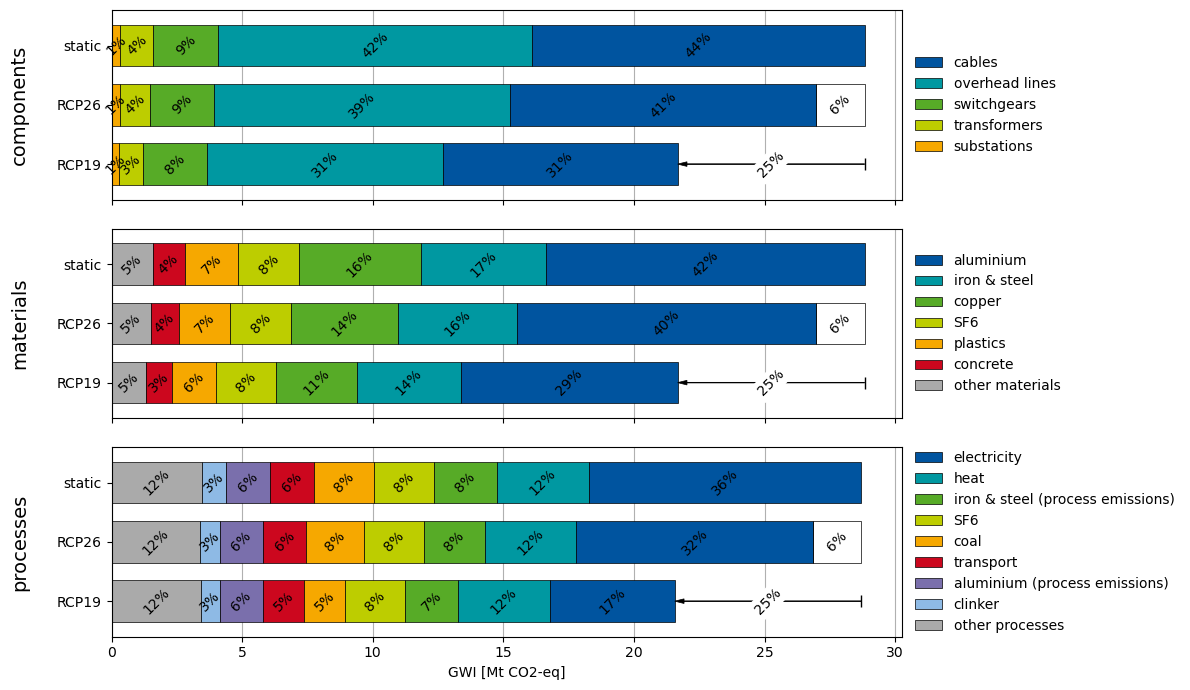

In [110]:
import matplotlib.pyplot as plt
import RWTHColors

components_plot = components / 1e9
materials_plot = materials / 1e9
processes_plot = processes / 1e9

plt.style.use("rwth")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 7), sharex=True)

# Plotting each DataFrame on its respective axis
component_colors = ["none"] + plot_colors[: len(components_plot) - 1] # was -2, but there is no others here+ ["#aaaaaa"]
components_plot.transpose().plot(
    kind="barh",
    stacked=True,
    ax=axes[0],
    width=0.7,
    color=component_colors[::-1],
    edgecolor="black",
    linewidth=0.5,
)

material_colors = ["none"] + plot_colors[: len(materials_plot) - 2] + ["#aaaaaa"]
materials_plot.transpose().plot(
    kind="barh",
    stacked=True,
    ax=axes[1],
    width=0.7,
    color=material_colors[::-1],
    edgecolor="black",
    linewidth=0.5,
)

process_colors = ["none"] + plot_colors[: len(processes_plot) - 2] + ["#aaaaaa"]
processes_plot.transpose().plot(
    kind="barh",
    stacked=True,
    ax=axes[2],
    width=0.7,
    color=process_colors[::-1],
    edgecolor="black",
    linewidth=0.5,
)

# Increase the size of the labels
axes[0].set_ylabel("components", fontsize=14, labelpad=20)  # Adjust fontsize as needed
axes[1].set_ylabel("materials", fontsize=14, labelpad=20)  # Adjust fontsize as needed
axes[2].set_ylabel("processes", fontsize=14, labelpad=20)  # Adjust fontsize as neede

for ax, data in zip(axes, [components_plot, materials_plot, processes_plot]):
    ax.invert_yaxis()
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    handles, labels = ax.get_legend_handles_labels()
    handles, labels = zip(*[(h, l) for h, l in zip(handles, labels) if l != "SPACING"])
    ax.legend(
        handles[::-1],
        labels[::-1],
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        frameon=False,
    )
    ax.xaxis.grid(
        True
    )  # Enable vertical grid lines (which are horizontal for the x-axis)
    ax.set_axisbelow(True)  # Ensure grid lines are below the bars

    # ADDING PERCENTAGES
    # Calculate the total for each bar (row in the data)
    totals = data.sum(axis=1)

    # Adding percentage labels to each bar
    for bar in ax.patches:
        width = (
            bar.get_width()
        )  # Get the width of the bar (which is the length along the x-axis)
        label_x_pos = bar.get_x() + width / 2  # X position for the label
        label_y_pos = bar.get_y() + bar.get_height() / 2  # Y position for the label
        total_width = sum(
            [p.get_width() for p in ax.patches if p.get_y() == bar.get_y()]
        )  # Sum width of all bars in this row
        percentage = width / total_width * 100  # Calculate percentage

        if percentage > 0:
            bbox_props = None
            if bar is ax.patches[-1]:  # Check if the current patch is the last one
                bbox_props = dict(
                    boxstyle="round,pad=0.3", ec="none", fc="white", alpha=1
                )

            ax.text(
                label_x_pos,
                label_y_pos,
                f"{percentage:.0f}%",
                ha="center",
                va="center",
                rotation=45,
                bbox=bbox_props,  # Apply the bbox properties only for the last patch
            )

    ax.patches[-1].set_edgecolor("none")

    # Arrow for last bar
    bar = ax.patches[-1]
    x_end = bar.get_x() + bar.get_width()  # The end x-coordinate of the bar
    y_position = bar.get_y() + bar.get_height() / 2  # The vertical center of the bar
    width = (
        bar.get_width()
    )  # The width of the bar, which will be used to calculate the arrow's length

    # Parameters for the arrow
    head_width = (
        bar.get_height() / 9
    )  # Adjust the size of the arrowhead to your liking
    head_length = (
        0.05 * width
    )  # Adjust the length of the arrowhead to your liking, proportional to the bar's width

    # Draw an arrow that starts from the end of the bar and points to its start
    ax.arrow(
        x_end,
        y_position,
        -width + head_length,
        0,  # Add head_length so arrowhead doesn't extend beyond the bar
        head_width=head_width,
        head_length=head_length,
        width=0.01,
        fc="black",
        ec="black",
        lw=0.5,
    )

    ax.plot(x_end, y_position, marker="|", color="black", markersize=8)


axes[-1].set_xlabel("GWI [Mt CO2-eq]")

plt.tight_layout(h_pad=0.5)
plt.savefig("fig_contributions.svg", format="svg", bbox_inches='tight')

plt.show()

## Other

Copper comparison today vs 2050

In [348]:
c_23 = bd.Database("ei310_SSP2_RCP26_2023").search("market for copper, cathode GLO")[0]
c_45 = bd.Database("ei310_SSP2_RCP26_2045").search("market for copper, cathode GLO")[0]

a_23 = bd.Database("ei310_SSP2_RCP26_2023").search("market for aluminium, wrought alloy GLO")[0]
a_45 = bd.Database("ei310_SSP2_RCP26_2045").search("market for aluminium, wrought alloy GLO")[0]


In [346]:
lca = bc.LCA({c_23: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.42e+13)
  warnings.warn(msg, UmfpackWarning)


6.455734497782667

In [347]:
lca = bc.LCA({c_45: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.21e+13)
  warnings.warn(msg, UmfpackWarning)


3.3904403277070507

In [351]:
lca = bc.LCA({a_23: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.42e+13)
  warnings.warn(msg, UmfpackWarning)


11.57862346517534

In [352]:
lca = bc.LCA({a_45: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.21e+13)
  warnings.warn(msg, UmfpackWarning)


6.770893739529213

In [11]:
al_23 = bd.Database("ei310_SSP2_RCP26_2023").search("market for aluminium, wrought GLO")[0]
al_40 = bd.Database("ei310_SSP2_RCP26_2040").search("market for aluminium, wrought GLO")[0]

In [31]:
lca = bc.LCA({bd.Database("ei310_SSP2_RCP26_2023").search("market for aluminium, wrought GLO")[0]: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.42e+13)
  warnings.warn(msg, UmfpackWarning)


11.57862346517534

In [30]:
el = bd.Database("ei310_SSP2_RCP26_2040").search("market group for electricity, high voltage DE")[0]

In [24]:
el = bd.Database("ei310_SSP2_RCP26_2040").search("market group for electricity, high voltage CHN")[0]

In [31]:
lca = bc.LCA({el: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 2.14e+13)
  warnings.warn(msg, UmfpackWarning)


0.10213535636501127

In [32]:
lca = bc.LCA({bd.Database("ei310_SSP2_RCP26_2040").search("market for aluminium, wrought GLO")[0]: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 2.14e+13)
  warnings.warn(msg, UmfpackWarning)


8.87389924007463

In [12]:
from polyviz import sankey

In [16]:
sankey(activity=al_40, method=method, level=10)

Calculating supply chain score...


/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 2.14e+13)
  warnings.warn(msg, UmfpackWarning)


Sankey diagram generated.


('/Users/timodiepers/Documents/Coding/paper-plca-grid-expansion/market for aluminium wrought alloy kilogram GLO EF v31 no LTclimate change no LTglobal warming potential GWP100 no LT sankey.html',
                                                 source  \
 0                m. for aluminium, wrought alloy (GLO)   
 1                              activities below cutoff   
 2    aluminium ingot, primary, to aluminium, wrough...   
 3    treatment of aluminium scrap, new, at remelter...   
 130                                          emissions   
 ..                                                 ...   
 173                                          emissions   
 128                            activities below cutoff   
 174                                          emissions   
 129                            activities below cutoff   
 175                                          emissions   
 
                                         target        weight       unit  
 0        m. for al